In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


In [40]:
import matplotlib.pyplot as plt
import numpy as np
from io import BytesIO
from PIL import Image
import pandas as pd
import requests
import os
try:
    os.chdir(os.path.join(os.getcwd(), 'homework'))
    print(os.getcwd())
except:
    pass

 ## 讀取 txt 檔
 * 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
 * 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

 ### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
 ### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
 ### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

In [41]:
# 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url = 'https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt'



In [42]:
response = requests.get(target_url)
data = response.text

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data[0:10]



784594


'n00015388_'

In [43]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
split_tag = '\n'

data = [d.split('\t') for d in data.split(split_tag)]
# data = data.split(split_tag)
print(len(data))

9996


 ## 將 txt 轉成 pandas dataframe

In [44]:

df = pd.DataFrame(data, columns=['name', 'url']).set_index('name', drop=True)
df.head()



,url
name,
n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
n00015388_355,http://img100.imageshack.us/img100/3253/forres...


 ## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

http://farm1.static.flickr.com/145/430300483_21e993670c.jpg


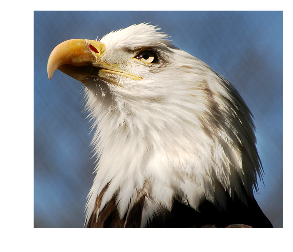

In [45]:

# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df.loc['n00015388_157']['url']
print(first_link)
response = requests.get(first_link)
img = Image.open(BytesIO(response.content))

# Convert img to numpy array

plt.imshow(img)
plt.show()



In [46]:
def img2arr_fromURLs(url_list, resize=False):
    img_list = []
    for url in url_list:
        response = requests.get(url)
        try:
            img = Image.open(BytesIO(response.content))
            img_list.append(img)
        except:
            pass

    return img_list



Total images that we got: 4 


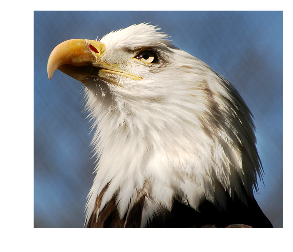

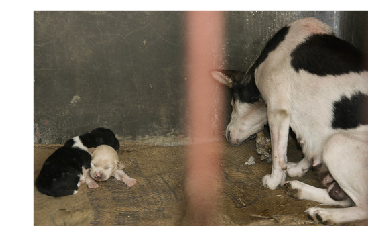

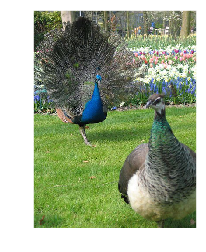

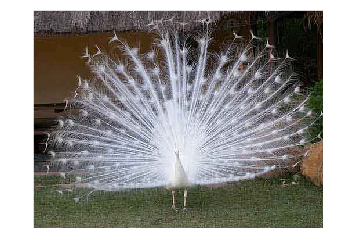

In [47]:
result = img2arr_fromURLs(df[0:5]['url'])
print("Total images that we got: %i " % len(result))  # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()
